In [18]:
import numpy as np
from collections import defaultdict
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from experiment_code.visualization.visualize import CoRTLanguageExp
from experiment_code.visualization.visualize import EnglishVerif

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
cort = CoRTLanguageExp()

In [20]:
df = cort.load_dataframe()

In [21]:
eng = EnglishVerif()

In [22]:
df_eng = eng.load_dataframe()

In [23]:
#df_eng = relabel_part_id(df_eng)

In [24]:
#df_eng = df_eng[df_eng.participant_id != 8]

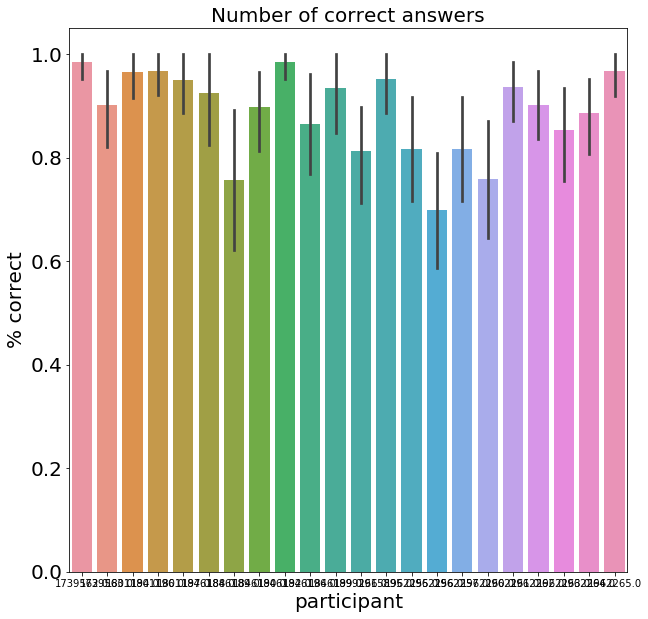

In [25]:
eng.participant_accuracy(df_eng)

In [26]:
def relabel_part_id(dataframe):
    # get all values of participant id
    old_id = dataframe['participant_id'].values

    # get new values of participant id
    temp = defaultdict(lambda: len(temp))
    res = [temp[ele] for ele in old_id]

    # assign new participant id to dataframe
    dataframe['participant_id'] = np.array(res) + 1
    
    return dataframe

In [27]:
#df = relabel_part_id(df)

In [28]:
def remove_bad_subjs(dataframe, bad_subjs):
    return dataframe[~dataframe['participant_id'].isin(bad_subjs)]

In [29]:
#df = remove_bad_subjs(df, bad_subjs = [8])
#df['participant_id'].unique

In [30]:
#df = df[df.participant_id != [8, 15]]

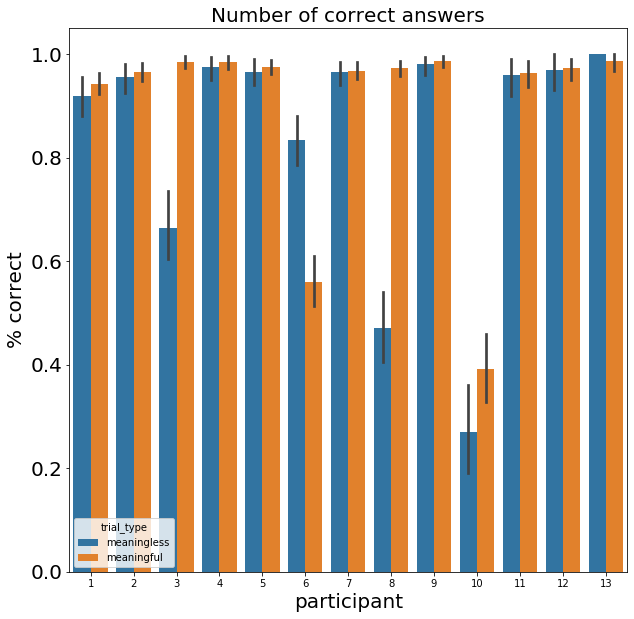

Answers mean: 0.8897727272727273


In [31]:
cort.participant_accuracy(df, hue = "trial_type")

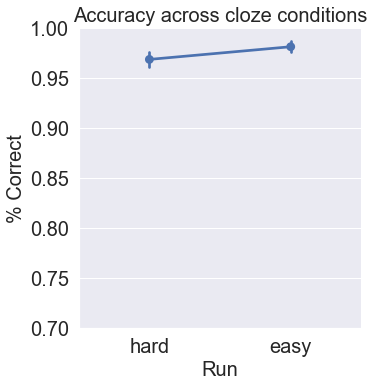

In [32]:
cort.accuracy_by_condition(df)

## Unfinished visualization functions

In [33]:
df.query('participant_id ==9')

#why only 3 blocks for participant #9? -> response type query
#need 'timelimit_screen'
#helpful but other problem - participant 10 w/ low accuracy, not 9

,local_date,experiment_id,experiment_version,participant_public_id,participant_id,task_name,task_version,spreadsheet_version,spreadsheet_row,sentence_num,...,orientation,negative,tense,spelling_modified,trial_type,version,version_descript,group_condition_name,group_CoRT_condition,group_trial_type
33984,18/08/2020 14:10:44,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,287.0,25,...,person,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient easy,patient strong non-CoRT,patient meaningless
33997,18/08/2020 14:10:51,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,288.0,26,...,person,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient easy,patient strong CoRT,patient meaningless
34009,18/08/2020 14:10:57,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,289.0,27,...,person,no,past,yes,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient hard,patient strong non-CoRT,patient meaningful
34022,18/08/2020 14:11:04,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,290.0,28,...,person,no,past,no,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient hard,patient strong non-CoRT,patient meaningful
34035,18/08/2020 14:11:11,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,291.0,29,...,person,no,past,no,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient hard,patient strong CoRT,patient meaningful
34048,18/08/2020 14:11:18,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,292.0,30,...,group,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient hard,patient strong non-CoRT,patient meaningless
34060,18/08/2020 14:11:24,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,293.0,31,...,object,no,past,no,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient easy,patient strong non-CoRT,patient meaningful
34072,18/08/2020 14:11:31,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,294.0,32,...,group,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient hard,patient strong CoRT,patient meaningless
34082,18/08/2020 14:11:36,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,295.0,33,...,group,yes,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient hard,patient strong non-CoRT,patient meaningless
34093,18/08/2020 14:11:42,21979.0,7.0,BLIND,9,cort_prepilot_task,36.0,FINAL sentences,296.0,34,...,person,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),patient easy,patient strong non-CoRT,patient meaningless


In [35]:
grouped_df = df.groupby(['participant_id', 'block_num']).mean()
grouped_df

experiment_id  experiment_version  task_version  \
participant_id block_num                                                    
1              1.0              22813.0                 4.0          36.5   
               2.0              22813.0                 4.0          36.5   
               3.0              22813.0                 4.0          36.5   
               4.0              22813.0                 4.0          36.5   
               5.0              22813.0                 4.0          36.5   
...                                 ...                 ...           ...   
13             1.0              21979.0                 7.0          36.0   
               2.0              21979.0                 7.0          36.0   
               3.0              21979.0                 7.0          36.0   
               4.0              21979.0                 7.0          36.0   
               5.0              21979.0                 7.0          36.0   

                          spreadsheet_row           rt  attempt   correct  \
participant_id block_num                                                    
1              1.0                  123.5   978.165836      1.0  0.937500   
               2.0                  286.0   959.914125      1.0  0.906250   
               3.0                  286.0   916.210820      1.0  0.968750   
               4.0                  123.5   902.728617      1.0  0.953125   
               5.0                  123.5   889.931695      1.0  0.914062   
...                                   ...          ...      ...       ...   
13             1.0                  318.5  1073.617969      1.0  1.000000   
               2.0                  253.5  1033.435234      1.0  0.984375   
               3.0                   58.5  1005.751953      1.0  1.000000   
               4.0                  188.5  1010.278688      1.0  0.984375   
               5.0                  123.5   973.849688      1.0  0.984375   

                          incorrect  randomise_blocks  CoRT_mean  CoRT_std  \
participant_id block_num                                                     
1              1.0         0.062500               2.0   2.950223  0.887840   
               2.0         0.093750               4.5   2.952548  0.842798   
               3.0         0.031250               4.5   2.952548  0.842798   
               4.0         0.046875               2.0   2.973605  0.863379   
               5.0         0.085938               2.0   2.973605  0.863379   
...                             ...               ...        ...       ...   
13             1.0         0.000000               5.0   2.896243  0.840926   
               2.0         0.015625               4.0   3.008854  0.844669   
               3.0         0.000000               1.0   2.989583  0.844400   
               4.0         0.015625               3.0   2.957626  0.882357   
               5.0         0.015625               2.0   2.950223  0.887840   

                          cloze_probability  word_count  version  
participant_id block_num                                          
1              1.0                 0.638906    8.062500     10.5  
               2.0                 0.635000    8.179688     10.5  
               3.0                 0.635000    8.179688     10.5  
               4.0                 0.650703    8.296875     10.5  
               5.0                 0.650703    8.296875     10.5  
...                                     ...         ...      ...  
13             1.0                 0.626094    8.093750     10.0  
               2.0                 0.643906    8.265625     10.0  
               3.0                 0.649688    8.218750     10.0  
               4.0                 0.651719    8.375000     10.0  
               5.0                 0.638906    8.062500     10.0  

[65 rows x 14 columns]

In [24]:
#rate of change across blocks (1-5)

#need more familiarity with multiindexing

df.groupby(['participant_id', 'block_num']).apply(lambda x: x['rt'].iloc[0] - df['rt'].iloc[4])

participant_id  block_num
1               1.0         -295.650000
                2.0          900.365000
                3.0          279.275000
                4.0         -116.090000
                5.0          -75.455000
2               1.0         -287.540000
                2.0         -309.825000
                3.0         -114.650000
                4.0         -268.180000
                5.0         -266.375000
3               1.0          215.800000
                2.0         -291.755000
                3.0           -1.245000
                4.0         -231.710000
                5.0         -319.900000
4               1.0          189.400000
                2.0         -218.890000
                3.0         -249.385000
                4.0           50.745000
                5.0         -439.925000
5               1.0          -70.470000
                2.0         -192.770000
                3.0         -359.570000
                4.0         -461.070000
              

In [ ]:
#df['rt_slope']=(df['rt']-df['rt'].iloc[0])/df['cloze_probability']

#groupby subject
#df[['participant_id','block_num','rt']]


grouped_df['rt_slope']=(df['rt']-df['rt'].iloc[0])/df['block_num']
#df['rt_slope']

#calc first and last trial 

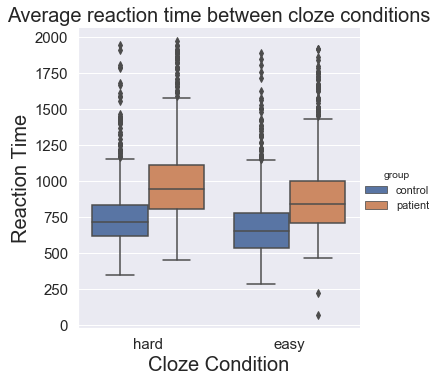

In [20]:
#plotting every dataframe - first group by subjects (above)
sns.set(rc={'figure.figsize':(20,10)})

sns.catplot(x="condition_name", y="rt_slope", hue='group', kind = 'box', data=df.query('correct==1 and trial_type=="meaningful"'))
plt.xlabel('Cloze Condition', fontsize=20),
plt.ylabel('Reaction Time', fontsize=20)
plt.title('Average reaction time between cloze conditions', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

#input string for certain groupby column

# table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
# ...                     aggfunc={'D': np.mean,
# ...                              'E': np.mean})
#index - each trial
#which avg from control vs patient
#create mean and sd columns

#sns.scatterplot(x = df.groupby('spreadsheet_row')['rt'].mean(), y = df.groupby('spreadsheet_row')['rt'].std())
sns.scatterplot(x=df.groupby('')['rt'].mean())
plt.xlabel('mean rt', fontsize=20)
plt.ylabel('std of rt', fontsize=20)
plt.title('item analysis of rt', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

In [ ]:
df.columns

In [ ]:
fig = plt.figure(figsize=(10,10))

participants = df['participant_id'].unique()

for i, participant in enumerate(participants):
    
    fig.add_subplot(1, len(participants), i+1)

    sns.scatterplot(x = df.groupby('spreadsheet_row')['cloze_probability'].mean(), y = df.groupby('spreadsheet_row')['rt'].mean())
    plt.xlabel('mean cloze probability', fontsize=20)
    plt.ylabel('mean rt', fontsize=20)
    plt.title('', fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

#look at group first

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

sns.scatterplot(x = df.groupby('spreadsheet_row')['cloze_probability'].mean(), y = df.groupby('spreadsheet_row')['rt'].mean())
plt.xlabel('mean cloze probability', fontsize=20)
plt.ylabel('mean rt', fontsize=20)
plt.title('', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()